In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.cm as cm

from instances.parser import *

from math import atan, cos, sin, pi

from E3PNT.e3pnt import *
from E3PNT.poly_function import *
from E2PNT.TwoPointEllipse import *

import time
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

9.5


<IPython.core.display.Javascript object>


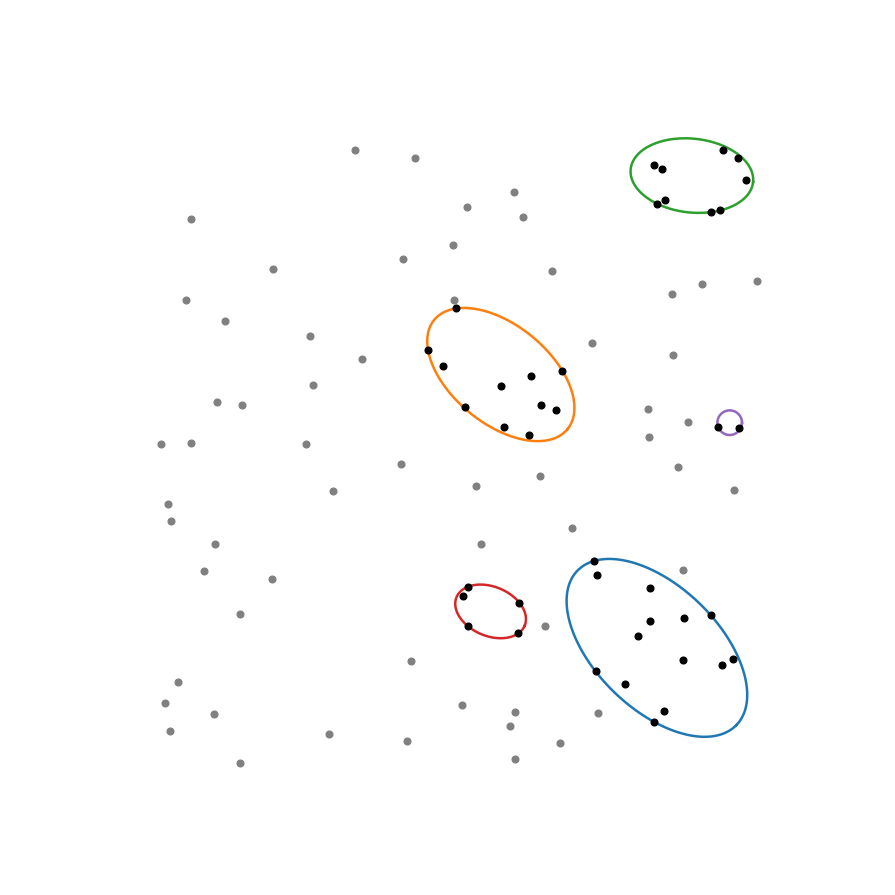

31.5


In [73]:
### plot solution of AB120

n=100
m=5

a = [9, 7, 5, 3, 1]
b = [5, 4, 3, 2, 1]
X = [7.18, 41.49, 16.91, 33.17, 45.22, 14.17, 5.09, 40.11, 30.61, 29.58, 28.18, 40.25, 9.68, 45.27, 43.01, 6.96, 41.28, 46.09, 31.44, 40.23, 41.45, 29.21, 33.91, 25.52, 0.92, 25.24, 35.95, 40.83, 5.78, 40.59, 48.07, 48.98, 45.99, 47.54, 24.34, 4.09, 42.17, 12.32, 2.62, 40.6, 42.94, 32.64, 31.33, 24.53, 9.58, 35.9, 12.66, 47, 29.96, 36.09, 32.31, 20.08, 23.48, 0.55, 20.24, 29.64, 6.99, 42.08, 35.75, 25.43, 31.73, 2.97, 46.2, 3.04, 44.51, 30.45, 29.32, 1.28, 32.93, 28.9, 42.98, 16.36, 20.83, 38.29, 25.06, 1.91, 25.04, 1.17, 4.86, 47.41, 43.35, 26.18, 28.4, 25.46, 29.29, 14.51, 12.91, 22.25, 39.32, 40.32, 24.27, 21.16, 47.12, 20.56, 26.55, 1.34, 45.84, 42.55, 4.97, 35.56]
Y = [29.31, 45.9, 33, 32.04, 12.19, 2.55, 29.52, 28.98, 31.6, 10.72, 30.85, 11.73, 40.29, 44.95, 11.97, 0.19, 48.45, 8.19, 29.26, 26.66, 4.4, 46.54, 19.32, 14.52, 5.1, 29.1, 15.49, 45.63, 36.1, 48.79, 47.55, 39.35, 45.08, 27.44, 37.77, 15.79, 33.3, 26.08, 37.84, 3.54, 15.84, 28.89, 23.47, 37.11, 15.11, 7.65, 34.88, 8.65, 44.54, 4.29, 40.18, 24.47, 32.4, 26.1, 41.15, 13.19, 12.28, 38.32, 16.61, 45.33, 11.32, 44.39, 49.97, 26.16, 39.13, 26.81, 0.53, 2.8, 1.83, 3.18, 8.55, 49.98, 8.45, 6.58, 13.72, 6.79, 4.89, 21.25, 4.21, 49.36, 27.86, 22.66, 27.46, 11.33, 4.36, 22.28, 30.87, 33.74, 10.55, 14.38, 42.23, 49.31, 22.33, 1.98, 17.97, 19.89, 27.51, 24.23, 18.02, 34.27]
wel = [4.5, 2.8, 1.5, 0.6, 0.1]

print(np.sum(wel))

#sol=[(40.8936457894048, 10.4154342705392, -1.01529004010942), (27.8687704471493, 32.1207108207771, -0.659068191863066), (44.8997353545191, 47.9000501752228, 0.212837117693241), (27.3018726170108, 12.4904419273173, -0.402986302762017), (1.58960755746569, 5.84271509947276, 1.04088432071609)]

#sol=[(4.08414272362457567e+01, 9.54558527987682481e+00, -7.70917583683945140e-01), (2.81641684848960416e+01, 3.17458348133985382e+01, -6.86637302818468687e-01), (4.36818042783351785e+01, 4.79050183203809823e+01, -1.06188214960723767e-01), (2.73337391282719828e+01, 1.25078490551193013e+01, -3.97580982518094872e-01), (4.67524826538768821e+01, 2.78353525499600352e+01, 0.00000000000000000e+00)]
sol=[(40.841427236245756660082, 9.545585279876824813527, -0.770917583683945140116), (28.164168484896041633192, 31.745834813398538187812, -0.686637302818468686638), (43.681804278335178537418, 47.905018320380982288498, -0.106188214960723767422), (27.333739128271982821161, 12.507849055119301340255, -0.397580982518094872002), (46.752482653876882068289, 27.835352549960035162258, 0.000000000000000000000)]


fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(10, 10))

cnt = 0

for i in range(n):
    covered = False
    x, y = X[i], Y[i]
    
    for j in range(m):
        
        xc, yc, theta = sol[j]
        
        if eval_ellipse(theta, a[j], b[j], xc, yc, x, y) - 1e-15 < 1:
            covered = True
    
    if covered:
        cnt += 1
        ax.scatter(x, y, zorder=10, color='black', s = 30, marker='o')
    else:
        ax.scatter(x, y, zorder=10, color='gray', s = 30, marker='o')
        

print(cnt-np.sum(wel))

ax.scatter([], [], zorder=100, color='black', s=50, marker='s', label='Covered')
ax.scatter([], [], zorder=100, color='black', s=50, marker='o', label='Uncovered')

#ax.legend()
ax.axis('off')

def ell_curve(a, b, xc, yc, theta):
    t = np.linspace(0, 2*pi, 1000)
    a+=1e-7
    b+=1e-7
    X = a * np.cos(t)
    Y = b * np.sin(t)
    
    XX = X * np.cos(-theta) + Y * np.sin(-theta)
    YY = Y * np.cos(-theta) - X * np.sin(-theta)
    XX += xc
    YY += yc
    
    return XX, YY


for i in range(m):
    xc, yc, theta = sol[i]
    
    #E=mp.patches.Ellipse([xc, yc], a[i] * 2, b[i] * 2, fill=False, angle=theta/pi * 180, color=colors[3], lw=2, alpha=1)
    #ax.add_patch(E)
    ax.plot(*ell_curve(a[i], b[i], xc, yc, theta), lw=2)
    
fig.savefig('AB120.pdf', bbox_inches="tight")